In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Set paths
base_path = "../data/raw"
ifi_path = os.path.join(base_path, "IFI Dataset", "India_Flood_Inventory_v3.csv")
shp_path = os.path.join(base_path, "shapefile", "india_flood_inventory_corrected.shp")

# Load data
ifi = pd.read_csv(ifi_path)
gdf = gpd.read_file(shp_path)

print(" IFI CSV shape:", ifi.shape)
print(" Shapefile shape:", gdf.shape)


 IFI CSV shape: (6876, 23)
 Shapefile shape: (1006, 10)


In [3]:
# Preview few rows
display(ifi.head())
display(gdf.head())

# Check column types
print("\nCSV Columns:", ifi.columns.tolist())
print("\nShapefile Columns:", gdf.columns.tolist())


,Unnamed: 0,UEI,Start Date,End Date,Duration(Days),Main Cause,Location,Districts,State,Latitude,...,Human fatality,Human injured,Human Displaced,Animal Fatality,Description of Casualties/injured,Extent of damage,Event Source,Event Souce ID,District_LGD_Codes,State_Codes
0,563,UEI-IMD-FL-1967-0001,02-07-1967 00:00,08-07-1967 00:00,7.0,flood,NaN,NaN,Assam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,NaN,18
1,564,UEI-IMD-FL-1967-0002,22-07-1967 00:00,28-07-1967 00:00,7.0,flood,NaN,NaN,"Maharashtra, Gujarat",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,NaN,"27,24"
2,565,UEI-IMD-FL-1967-0003,01-08-1967 00:00,30-08-1967 00:00,30.0,flood,NaN,NaN,Uttar Pradesh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,NaN,9
3,566,UEI-IMD-FL-1967-0004,08-09-1967 00:00,09-09-1967 00:00,2.0,flood,NaN,"Bhadrak, Dhenkanal, Jajapur, Subarnapur, Nuapa...","Odisha, Bihar, Uttar Pradesh, Madhya Pradesh, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,Marooning of Barwer Express,IMD,NaN,"348, 352, 356, None, 368, 345, 349, 350, 359, ...","21,10,9,23,8,6"
4,567,UEI-IMD-FL-1968-0001,22-06-1968 00:00,28-06-1968 00:00,7.0,flood,NaN,NaN,Assam,NaN,...,NaN,NaN,NaN,NaN,NaN,"Affecting about one million people,an area of ...",IMD,NaN,NaN,18


,FID,StartDate,EndDate,State,Districts,MainCause,EventSour,Number,cause_index,geometry
0,UEI-IMD-FL-2014-0001,02-05-2014,12-05-2014,ANDHRA PRADESH,Adilabad,Heavy rains,IMD,210,2,"POLYGON ((78.84972 19.7601, 78.85102 19.75945,..."
1,UEI-IMD-FL-2014-0001,02-05-2014,12-05-2014,ANDHRA PRADESH,Karimnagar,Heavy rains,IMD,210,2,"POLYGON ((79.90092 18.83464, 79.91605 18.81054..."
2,UEI-IMD-FL-2014-0001,02-05-2014,12-05-2014,ANDHRA PRADESH,Khammam,Heavy rains,IMD,210,2,"POLYGON ((80.9818 18.17367, 80.98195 18.16474,..."
3,UEI-IMD-FL-2014-0001,02-05-2014,12-05-2014,ANDHRA PRADESH,Krishna,Heavy rains,IMD,210,2,"MULTIPOLYGON (((80.60374 17.12738, 80.61251 17..."
4,UEI-IMD-FL-2014-0001,02-05-2014,12-05-2014,ANDHRA PRADESH,Kurnool,Heavy rains,IMD,210,2,"POLYGON ((78.92098 16.11569, 78.93327 16.06979..."



CSV Columns: ['Unnamed: 0', 'UEI', 'Start Date', 'End Date', 'Duration(Days)', 'Main Cause', 'Location', 'Districts', 'State', 'Latitude', 'Longitude', 'Severity', 'Area Affected', 'Human fatality', 'Human injured', 'Human Displaced', 'Animal Fatality', 'Description of Casualties/injured', 'Extent of damage ', 'Event Source', 'Event Souce ID', 'District_LGD_Codes', 'State_Codes']

Shapefile Columns: ['FID', 'StartDate', 'EndDate', 'State', 'Districts', 'MainCause', 'EventSour', 'Number', 'cause_index', 'geometry']


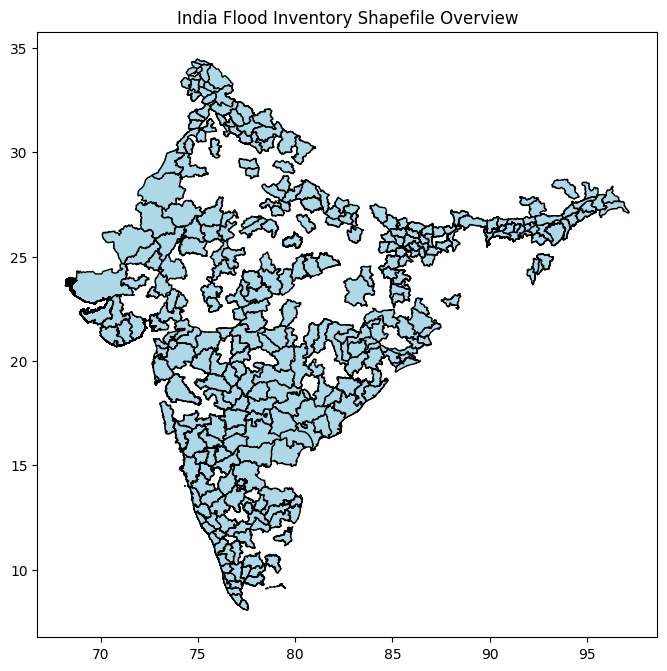

In [4]:
# Quick check if geometry exists
gdf.plot(figsize=(8,8), color='lightblue', edgecolor='black')
plt.title("India Flood Inventory Shapefile Overview")
plt.show()


In [5]:
ifi_cols = [c.lower() for c in ifi.columns]
gdf_cols = [c.lower() for c in gdf.columns]
set(ifi_cols).intersection(gdf_cols)


{'districts', 'state'}

In [9]:
import pandas as pd

# Paths to CSVs
csv1 = "../data/raw/IFI Dataset/District_FloodedArea.csv"
csv2 = "../data/raw/IFI Dataset/District_FloodImpact.csv"
csv3 = "../data/raw/IFI Dataset/India_Flood_Inventory_v3.csv"

# Load small previews
df1 = pd.read_csv(csv1)
df2 = pd.read_csv(csv2)
df3 = pd.read_csv(csv3)

print("District_FloodedArea.csv columns:\n", df1.columns.tolist(), "\n")
print("District_FloodImpact.csv columns:\n", df2.columns.tolist(), "\n")
print("India_Flood_Inventory_v3.csv columns:\n", df3.columns.tolist(), "\n")

print("Sample rows from India_Flood_Inventory_v3:")
display(df3.head())


District_FloodedArea.csv columns:
 ['Dist_Name', 'Percent_Flooded_Area', 'Parmanent_Water', 'Corrected_Percent_Flooded_Area'] 

District_FloodImpact.csv columns:
 ['Dist_Name', 'Human_fatality', 'Human_injured', 'Population', 'Mean_Flood_Duration'] 

India_Flood_Inventory_v3.csv columns:
 ['Unnamed: 0', 'UEI', 'Start Date', 'End Date', 'Duration(Days)', 'Main Cause', 'Location', 'Districts', 'State', 'Latitude', 'Longitude', 'Severity', 'Area Affected', 'Human fatality', 'Human injured', 'Human Displaced', 'Animal Fatality', 'Description of Casualties/injured', 'Extent of damage ', 'Event Source', 'Event Souce ID', 'District_LGD_Codes', 'State_Codes'] 

Sample rows from India_Flood_Inventory_v3:


,Unnamed: 0,UEI,Start Date,End Date,Duration(Days),Main Cause,Location,Districts,State,Latitude,...,Human fatality,Human injured,Human Displaced,Animal Fatality,Description of Casualties/injured,Extent of damage,Event Source,Event Souce ID,District_LGD_Codes,State_Codes
0,563,UEI-IMD-FL-1967-0001,02-07-1967 00:00,08-07-1967 00:00,7.0,flood,NaN,NaN,Assam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,NaN,18
1,564,UEI-IMD-FL-1967-0002,22-07-1967 00:00,28-07-1967 00:00,7.0,flood,NaN,NaN,"Maharashtra, Gujarat",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,NaN,"27,24"
2,565,UEI-IMD-FL-1967-0003,01-08-1967 00:00,30-08-1967 00:00,30.0,flood,NaN,NaN,Uttar Pradesh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,NaN,9
3,566,UEI-IMD-FL-1967-0004,08-09-1967 00:00,09-09-1967 00:00,2.0,flood,NaN,"Bhadrak, Dhenkanal, Jajapur, Subarnapur, Nuapa...","Odisha, Bihar, Uttar Pradesh, Madhya Pradesh, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,Marooning of Barwer Express,IMD,NaN,"348, 352, 356, None, 368, 345, 349, 350, 359, ...","21,10,9,23,8,6"
4,567,UEI-IMD-FL-1968-0001,22-06-1968 00:00,28-06-1968 00:00,7.0,flood,NaN,NaN,Assam,NaN,...,NaN,NaN,NaN,NaN,NaN,"Affecting about one million people,an area of ...",IMD,NaN,NaN,18


In [19]:
ifi = ifi.copy()  # prevent SettingWithCopyWarning

ifi['Start Date'] = pd.to_datetime(ifi['Start Date'], errors='coerce')
ifi['End Date'] = pd.to_datetime(ifi['End Date'], errors='coerce')

print("Missing Start Dates:", ifi['Start Date'].isna().sum())
print("Missing End Dates:", ifi['End Date'].isna().sum())

# Handle missing
ifi['End Date'] = ifi['End Date'].fillna(ifi['Start Date'])
ifi['Start Date'] = ifi['Start Date'].fillna(ifi['End Date'])

# Remove rows with both missing (just in case)
ifi = ifi.dropna(subset=['Start Date', 'End Date'])

ifi['Duration(Days)'] = (ifi['End Date'] - ifi['Start Date']).dt.days

print("Missing Start Dates after:", ifi['Start Date'].isna().sum())
print("Missing End Dates after:", ifi['End Date'].isna().sum())
print("Average Flood Duration (days):", ifi['Duration(Days)'].mean())
print("Number of unique events:", ifi['UEI'].nunique())
print("Number of affected districts:", ifi['Districts'].nunique())


Missing Start Dates: 0
Missing End Dates: 0
Missing Start Dates after: 0
Missing End Dates after: 0
Average Flood Duration (days): 22.43182579564489
Number of unique events: 2985
Number of affected districts: 1638


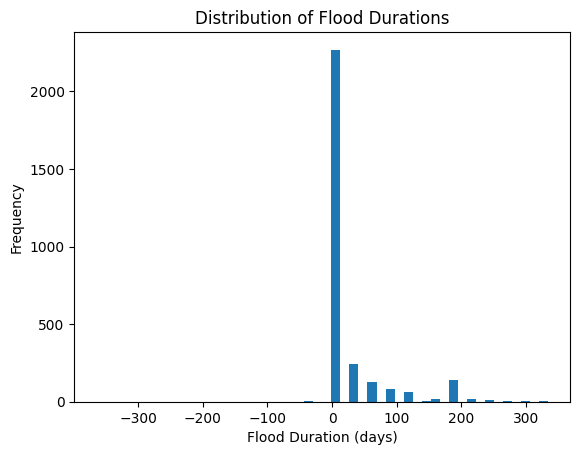

In [20]:
import matplotlib.pyplot as plt
plt.hist(ifi['Duration(Days)'], bins=50)
plt.xlabel('Flood Duration (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Flood Durations')
plt.show()


In [21]:
ifi[['Human fatality', 'Human injured', 'Area Affected']].corr()


,Human fatality,Human injured,Area Affected
Human fatality,1.000000,0.075203,NaN
Human injured,0.075203,1.000000,NaN
Area Affected,NaN,NaN,NaN


<Axes: ylabel='Districts'>

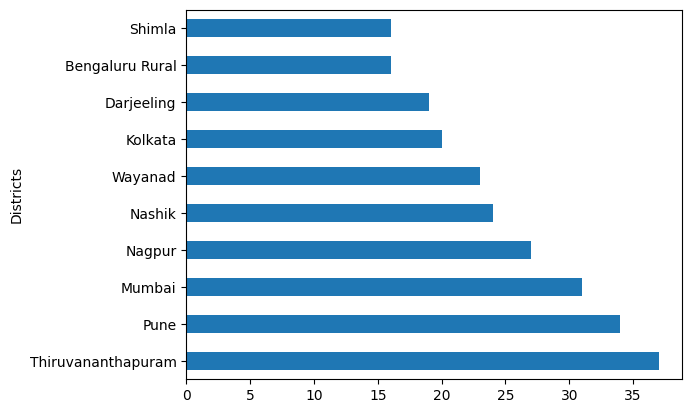

In [23]:
#Plot top 10 flood-prone districts:
ifi['Districts'].value_counts().head(10).plot(kind='barh')


In [24]:
#Saving cleaned IFI data csv 
ifi.to_csv("../data/processed/IFI_cleaned.csv", index=False)
